In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [2]:
class LineElement:
    
    def __init__(self, name, element, length, ZCoordinate, XCoordinate, position, angle, lineAngle):
        self.name = name
        self.element = element
        self.length = float(length)
        self.startCoordinates = [ZCoordinate, XCoordinate]
        self.position = position
        self.angle = angle
        self.lineAngle = lineAngle
        
        
def PicKColor(elemNumber):
    if elemNumber == '8' :
        color = 'green'
    elif elemNumber == '2' or elemNumber == '3' :
        color = 'blue'
    elif elemNumber == '20' :
        color = 'goldenrod'
    elif elemNumber == '10' :
        color = 'black'        
    elif elemNumber == '6' or elemNumber == '7' or elemNumber == '9' or elemNumber == '22'  or elemNumber == '14':
        color = 'pink'
    else:
        color = 'red'
    return(color)

In [3]:
def ConvertToList(lines):
    elements = []
    startCoordinateZ = 0
    startCoordinateX = 0
    lineAngle = 0
    for i, entry in enumerate(lines):

        name = entry[:10]

        rest = [j for j in entry[10:].split(' ') if j != '']

        element = rest[0]
        length  = float(rest[1])


        #might break if length entry <39?
        angle = entry[30:39].strip(' ')
        if angle == '':
            angle=0
        else:
            angle = float(angle)
            lineAngle += angle

        position = i


        #if length == 0: continue





        elements.append(LineElement(name, element, length, startCoordinateZ, startCoordinateX, position, angle, lineAngle))


        startCoordinateZ += length * np.cos(lineAngle)
        startCoordinateX += length * np.sin(lineAngle)

        #print(name, startCoordinateZ,'       ', startCoordinateX)
    return(elements)

In [12]:
def PlotLine(elements):

    
    fig, ax = plt.subplots()
    sizeRect = 1

    prevAngle = 0


    for item in elements:
        if item.element == '1': continue

        z = item.startCoordinates[0]

        x = item.startCoordinates[1]


        length = item.length
        color = PicKColor(item.element)
        angle = item.angle
        lineAngle = item.lineAngle


        ZoffsetRectCorner =  0#np.sin((angle - lineAngle)/2) * sizeRect/2 
        XoffsetRectCorner = 0#sizeRect/2-np.cos((angle - lineAngle)/2) * sizeRect/2     


        rect = Rectangle((0,0), length, sizeRect, angle=0, color=color, alpha=0.4)

        rect.set_xy((z + ZoffsetRectCorner, x-(sizeRect/2 + XoffsetRectCorner)))
        ax.add_patch(rect)

        prevAngle = angle

    ax.grid()
    ax.set_xlim(0, ((z+50)//50)*50)
    ax.set_ylim(0, 50)
    #plt.grid()
    #plt.show()
    return(ax)

In [13]:
beatchIN = "H2-VLE-v3-BEATCH.in" #"NewH2_BEATCH_v0.in"
nskipStart = 2
with open(beatchIN) as f:
    
    lines = f.read().splitlines()[nskipStart:-3]
    
    
linesVLE = lines#[170:-50]



beatchIN = "NewH2_BEATCH_v0.in"
nskipStart = 2
with open(beatchIN) as f:
    
    lines = f.read().splitlines()[nskipStart:-3]
    
    
linesH2 = lines#[170:-50]

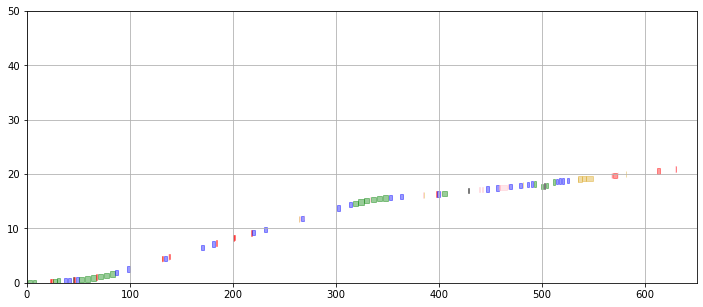

In [15]:
plt.rcParams["figure.figsize"] = (12,5)

elements = ConvertToList(linesVLE)
axVLE = PlotLine(elements)

#elements = ConvertToList(linesH2)
#axH2 = PlotLine(elements)

plt.show()